In [224]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

In [225]:
# Definiši dataset
data = {
    'age': ['young', 'young', 'middle_aged', 'senior', 'senior', 'senior', 'middle_aged', 'young', 'young', 'senior', 'young', 'middle_aged', 'middle_aged', 'senior', 'young', 'young', 'senior', 'young', 'middle_aged'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium', 'medium', 'high', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent', 'fair'],
    'class:buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes']
}

In [226]:
# Kreiraj DataFrame od dataseta
df = pd.DataFrame(data)

In [227]:
# Kodiraj kategoričke atribute
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [228]:
# Podeli podatke na atribute i ciljni atribut
X = df.drop('class:buys_computer', axis=1)
y = df['class:buys_computer']

In [229]:
# Kreiraj i treniraj model ID3 stabla
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

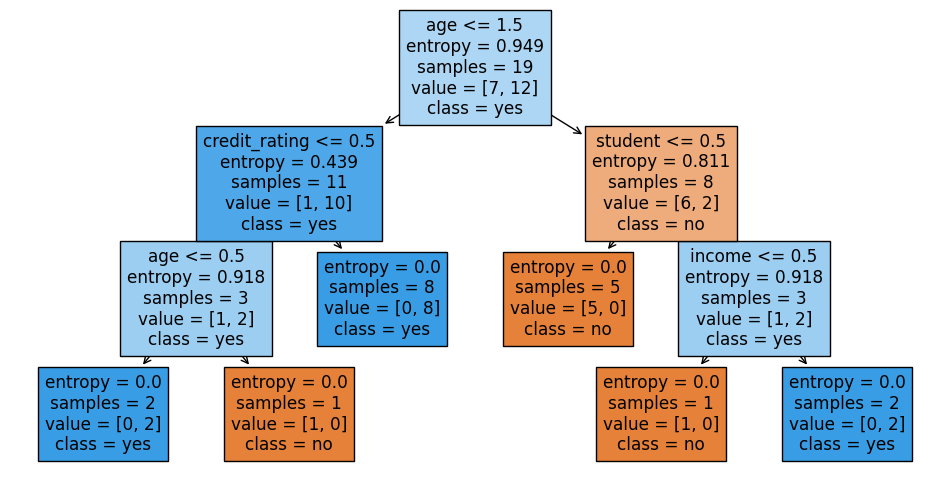

In [230]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# Iscrtaj stablo odlučivanja
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()

In [234]:
# Izvrši predikciju na novim podacima
new_data = {
    'age': [1],  # 'young' je kodirano kao 1
    'income': [0],  # 'high' je kodirano kao 0
    'student': [1],  # 'yes' je kodirano kao 1
    'credit_rating': [0]  # 'fair' je kodirano kao 0
}


In [235]:
# Pretvori novi podaci u DataFrame
new_df = pd.DataFrame(new_data)

# Izvrši predikciju
prediction = model.predict(new_df)
prediction = label_encoder.inverse_transform(prediction)

# Ispisi predikciju
print("Predikcija: ", prediction)

Predikcija:  ['no']
